## Purpose

Compute the proportion os positive windows per attack file

In [1]:
import json
from sklearn.metrics import roc_auc_score, average_precision_score
import pandas as pd
from collections import defaultdict
from matplotlib import pyplot as plt
import seaborn as sns
import os
import numpy as np

## Load the Dataset

In [2]:
file = "results_positive_proportion_correlated_signal_attack_1_masquerade_ROAD.json"

with open(f"/home/cloud/Projects/CAN/signal-ids-benchmark/data/{file}", "r") as outfile:
    grid2performance = json.load(outfile)

In [3]:
grid2performance.keys()

dict_keys(['50-10', '50-20', '50-30', '50-40', '50-50', '100-10', '100-20', '100-30', '100-40', '100-50', '100-60', '100-70', '100-80', '100-90', '100-100', '150-10', '150-20', '150-30', '150-40', '150-50', '150-60', '150-70', '150-80', '150-90', '150-100', '150-110', '150-120', '150-130', '150-140', '150-150', '200-10', '200-20', '200-30', '200-40', '200-50', '200-60', '200-70', '200-80', '200-90', '200-100', '200-110', '200-120', '200-130', '200-140', '200-150', '200-160', '200-170', '200-180', '200-190', '200-200', '250-10', '250-20', '250-30', '250-40', '250-50', '250-60', '250-70', '250-80', '250-90', '250-100', '250-110', '250-120', '250-130', '250-140', '250-150', '250-160', '250-170', '250-180', '250-190', '250-200', '250-210', '250-220', '250-230', '250-240', '250-250', '300-10', '300-20', '300-30', '300-40', '300-50', '300-60', '300-70', '300-80', '300-90', '300-100', '300-110', '300-120', '300-130', '300-140', '300-150', '300-160', '300-170', '300-180', '300-190', '300-200',

In [4]:
grid2performance['50-10']

{'positive_proportion': 0.6369047619047619}

In [5]:
key2aucroc = defaultdict(list)
index = []

for key in grid2performance.keys():

    # ground_truth = grid2performance[key]["ground_truth"]
    # predict_proba = grid2performance[key]["predict_proba"]
    positive_proportion = grid2performance[key]["positive_proportion"]

    # print(key)
    # if len(set(ground_truth)) == 1:
    #     print(ground_truth)

    # print(len(ground_truth), ground_truth)
    # print(len(predict_proba), predict_proba)

    columns = key.split("-")

    # print(columns)
    key2aucroc[columns[0]].append(positive_proportion)
    # sample.append(dict(entry))

    if columns[1] not in index: 
        index.append(columns[1])

    # break

key2aucroc = dict(key2aucroc)
# print(key2aucroc)
# print(len(index), index)

df_rocauc = pd.DataFrame({k:pd.Series(v) for k, v in key2aucroc.items()})
df_rocauc.index = index

In [6]:
display(df_rocauc)
df_rocauc = df_rocauc[::-1] # invert the order of dataframe rows
display(df_rocauc)

# Compute basic statistics about elements in the frame
print("mean:", np.nanmean(df_rocauc))
print("std", np.nanstd(df_rocauc))
print("median", np.nanmedian(df_rocauc))

,50,100,150,200,250,300,350,400
10,0.636905,0.661631,0.687117,0.713396,0.740506,0.768489,0.797386,0.827243
20,0.633136,0.662651,0.682927,0.714286,0.735849,0.769231,0.792208,0.827815
30,0.637168,0.657658,0.681818,0.712963,0.735849,0.761905,0.796117,0.821782
40,0.635294,0.654762,0.674699,0.716049,0.737500,0.759494,0.782051,0.828947
50,0.632353,0.656716,0.681818,0.707692,0.734375,0.761905,0.790323,0.819672
60,NaN,0.660714,0.678571,0.709091,0.722222,0.754717,0.788462,0.823529
70,NaN,0.632653,0.666667,0.680851,0.717391,0.739130,0.755556,0.795455
80,NaN,0.627907,0.666667,0.707317,0.707317,0.750000,0.750000,0.794872
90,NaN,0.631579,0.657895,0.702703,0.722222,0.750000,0.771429,0.800000
100,NaN,0.647059,0.676471,0.696970,0.727273,0.750000,0.781250,0.806452


,50,100,150,200,250,300,350,400
400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.666667
390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.666667
380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.666667
370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.700000
360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.700000
350,NaN,NaN,NaN,NaN,NaN,NaN,0.700000,0.700000
340,NaN,NaN,NaN,NaN,NaN,NaN,0.700000,0.700000
330,NaN,NaN,NaN,NaN,NaN,NaN,0.727273,0.727273
320,NaN,NaN,NaN,NaN,NaN,NaN,0.727273,0.727273
310,NaN,NaN,NaN,NaN,NaN,NaN,0.727273,0.727273


mean: 0.7194613910228959
std 0.049433096402197806
median 0.7142857142857143


## Visualization

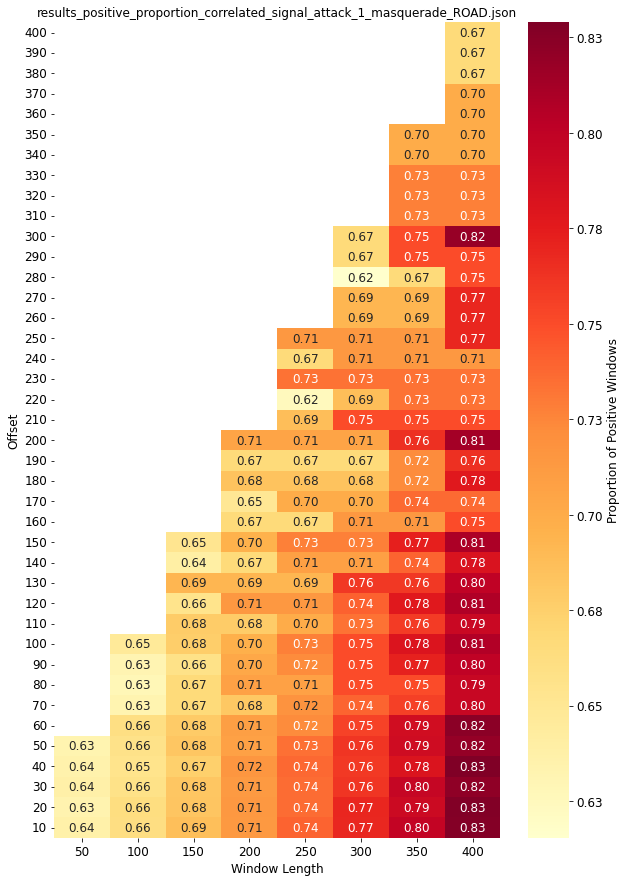

In [7]:
fig, ax = plt.subplots(figsize=(10, 15))

g = sns.heatmap(df_rocauc, annot=True, cbar=True, cbar_kws={"label": "Proportion of Positive Windows", "location":"right", "pad":0.05, "format":"%.2f"}, 
        annot_kws={"size": 12}, fmt=".2f", ax=ax, cmap="YlOrRd")

ax.set_ylabel("Offset", fontsize=12)
ax.set_xlabel("Window Length", fontsize=12)
ax.set_title(file, fontsize=12)

# colobar
cax = g.figure.axes[-1]
cax.yaxis.label.set_size(12)
cax.tick_params(labelsize=12)

# x-axis
g.set_xticklabels(g.get_xticklabels(), rotation=0, fontsize=12)

# y-axis
if g.get_yticklabels():
        g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=12)

## Positive Proportion All Attack Files

In [8]:
print(os.getcwd())
os.chdir("/home/cloud/Projects/CAN/signal-ids-benchmark/data/")
print(os.getcwd())

/home/cloud/ceph-robust/CAN/signal-ids-benchmark/notebooks
/home/cloud/Projects/CAN/signal-ids-benchmark/data


In [9]:
files = []

for file in os.listdir("../data/"):
    if file.startswith("results_positive_proportion_"):
        # if file.endswith("_distribution_ROAD.json"):
        files.append(file)
        # print(file)

files = sorted(files)
print(files)
#files = [files[8], files[7], files[1], files[5], files[4], files[12], files[3], files[2], files[11]]
#print(files)

['results_positive_proportion_correlated_signal_attack_1_masquerade_ROAD.json', 'results_positive_proportion_correlated_signal_attack_2_masquerade_ROAD.json', 'results_positive_proportion_correlated_signal_attack_3_masquerade_ROAD.json', 'results_positive_proportion_max_engine_coolant_temp_attack_masquerade_ROAD.json', 'results_positive_proportion_max_speedometer_attack_1_masquerade_ROAD.json', 'results_positive_proportion_max_speedometer_attack_2_masquerade_ROAD.json', 'results_positive_proportion_max_speedometer_attack_3_masquerade_ROAD.json', 'results_positive_proportion_reverse_light_off_attack_1_masquerade_ROAD.json', 'results_positive_proportion_reverse_light_off_attack_2_masquerade_ROAD.json', 'results_positive_proportion_reverse_light_off_attack_3_masquerade_ROAD.json', 'results_positive_proportion_reverse_light_on_attack_1_masquerade_ROAD.json', 'results_positive_proportion_reverse_light_on_attack_2_masquerade_ROAD.json', 'results_positive_proportion_reverse_light_on_attack_3_

results_positive_proportion_correlated_signal_attack_1_masquerade_ROAD.json


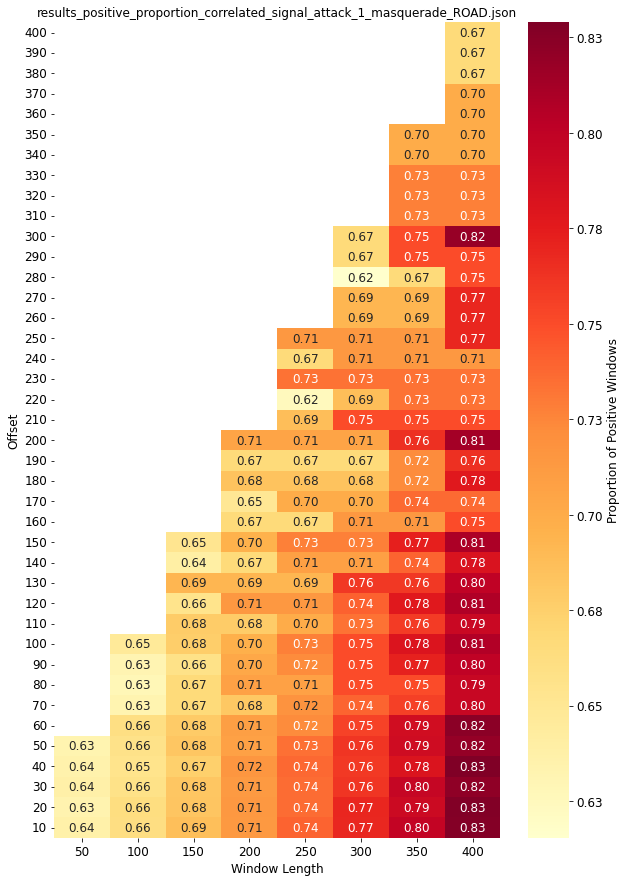

mean:  0.7194613910228959
std:  0.049433096402197806
median:  0.7142857142857143 

results_positive_proportion_correlated_signal_attack_2_masquerade_ROAD.json


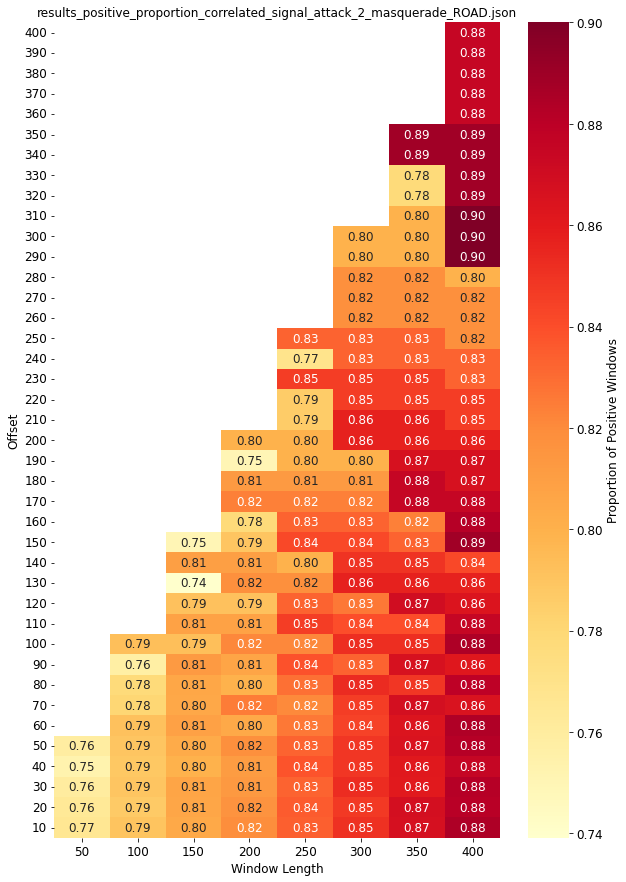

mean:  0.8311453766880558
std:  0.03543026175712983
median:  0.8333333333333334 

results_positive_proportion_correlated_signal_attack_3_masquerade_ROAD.json


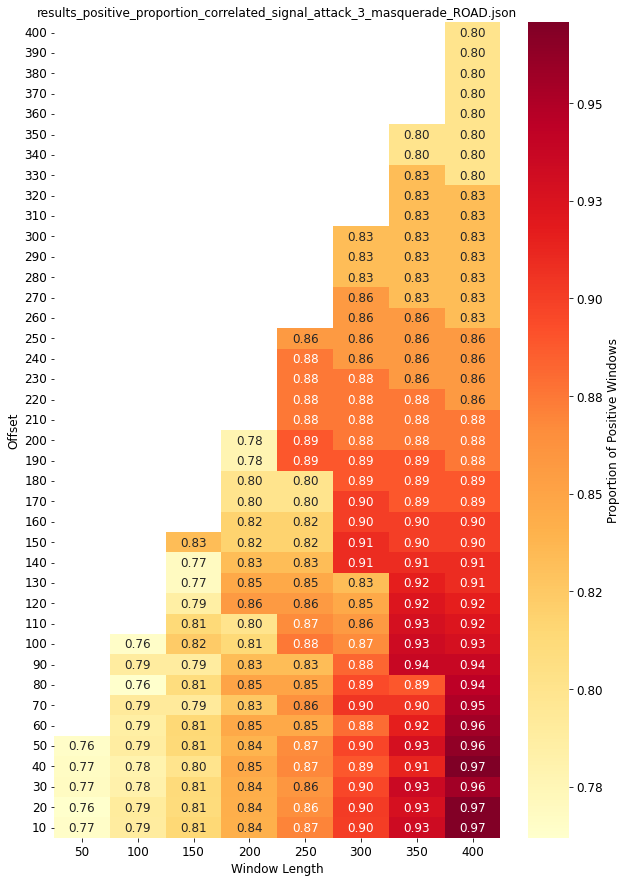

mean:  0.8542725192995456
std:  0.049718286969371
median:  0.8571428571428571 

results_positive_proportion_max_engine_coolant_temp_attack_masquerade_ROAD.json


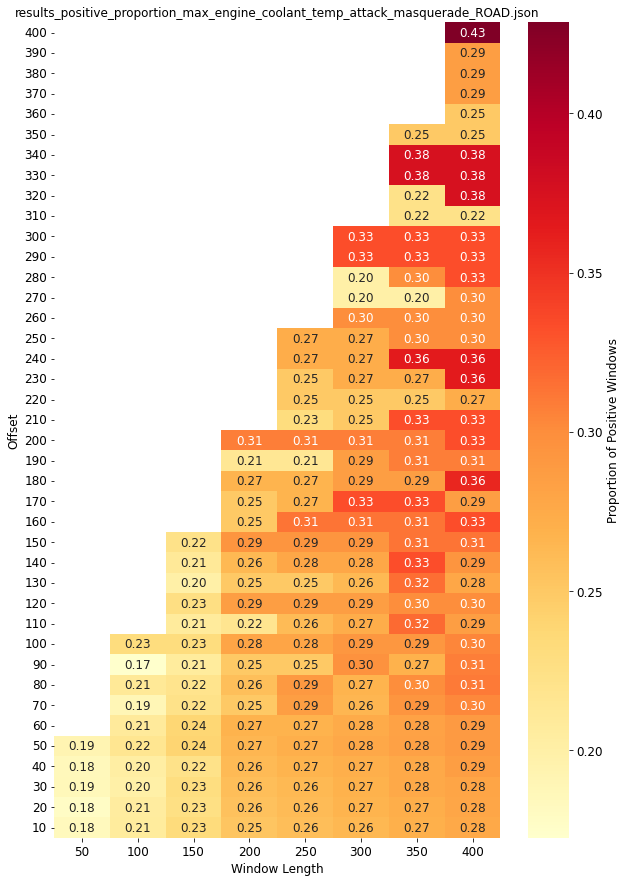

mean:  0.27393156998050855
std:  0.045374973768198434
median:  0.2727272727272727 

results_positive_proportion_max_speedometer_attack_1_masquerade_ROAD.json


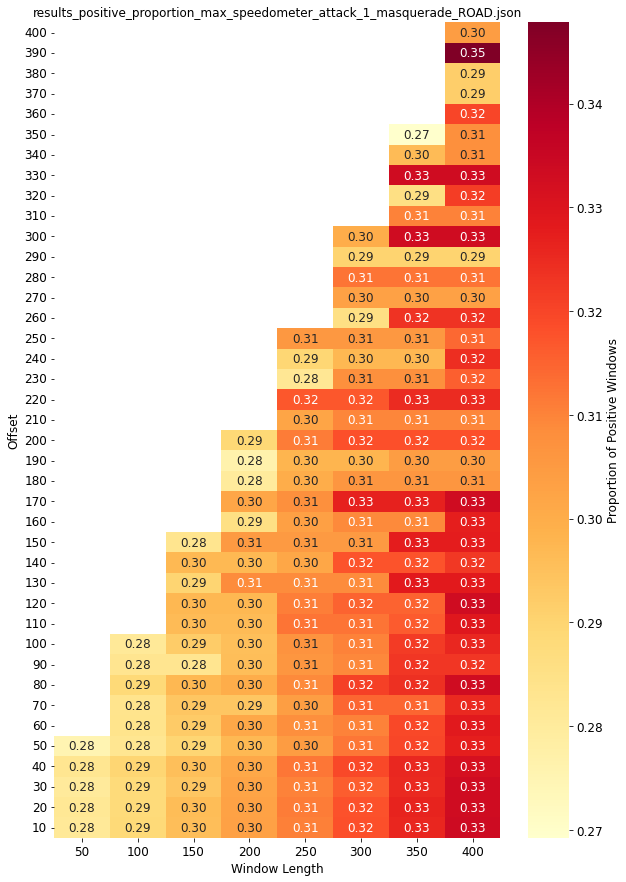

mean:  0.30735726994220175
std:  0.015238365751679125
median:  0.3076923076923077 

results_positive_proportion_max_speedometer_attack_2_masquerade_ROAD.json


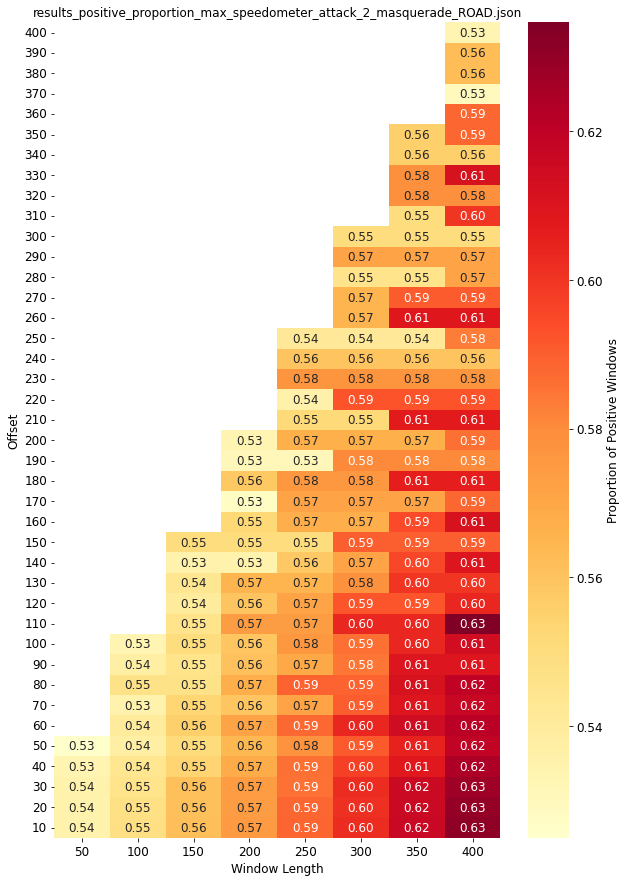

mean:  0.5744298194154721
std:  0.026193900448872962
median:  0.5714285714285714 

results_positive_proportion_max_speedometer_attack_3_masquerade_ROAD.json


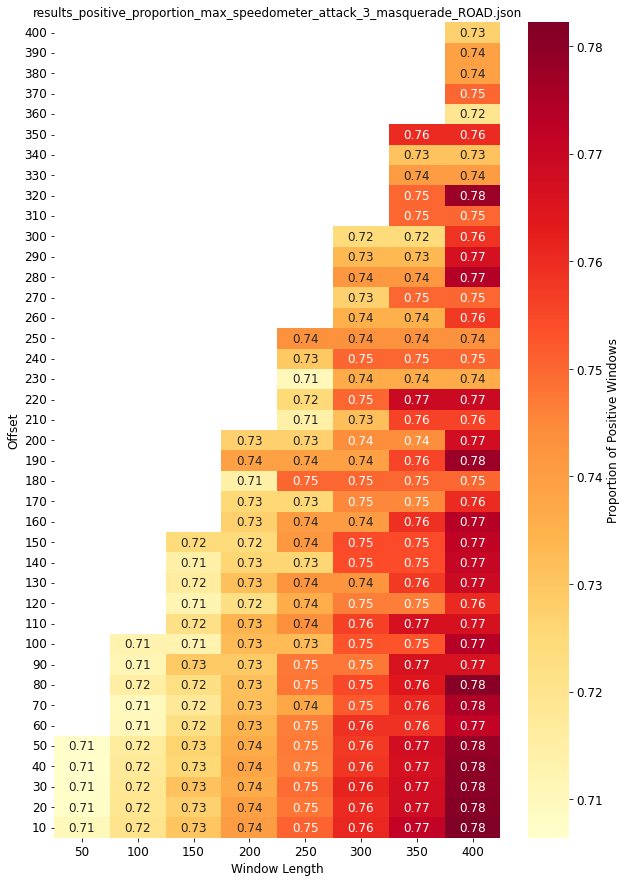

mean:  0.7432508049022292
std:  0.01886208906500841
median:  0.7428571428571429 

results_positive_proportion_reverse_light_off_attack_1_masquerade_ROAD.json


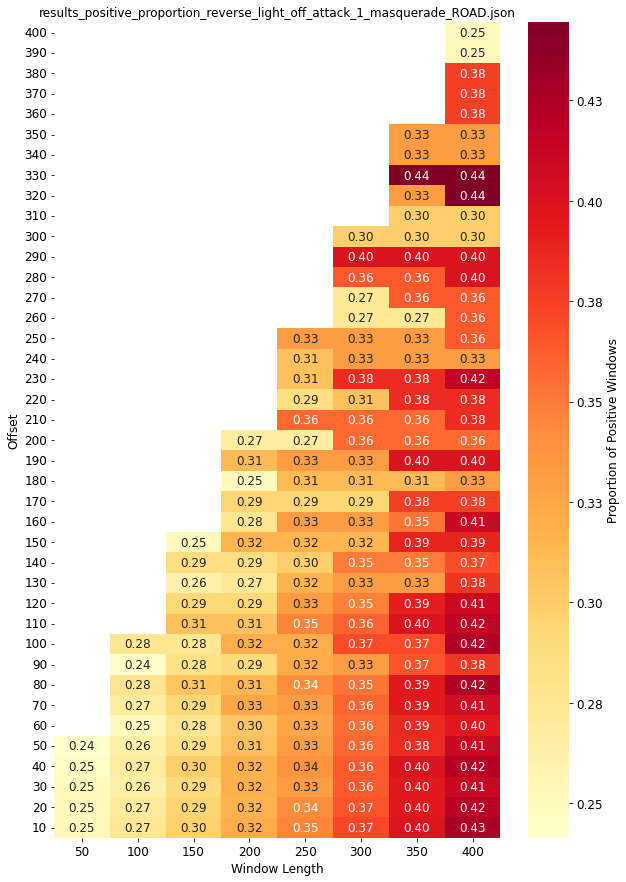

mean:  0.3360019847179792
std:  0.04936406749260298
median:  0.3333333333333333 

results_positive_proportion_reverse_light_off_attack_2_masquerade_ROAD.json


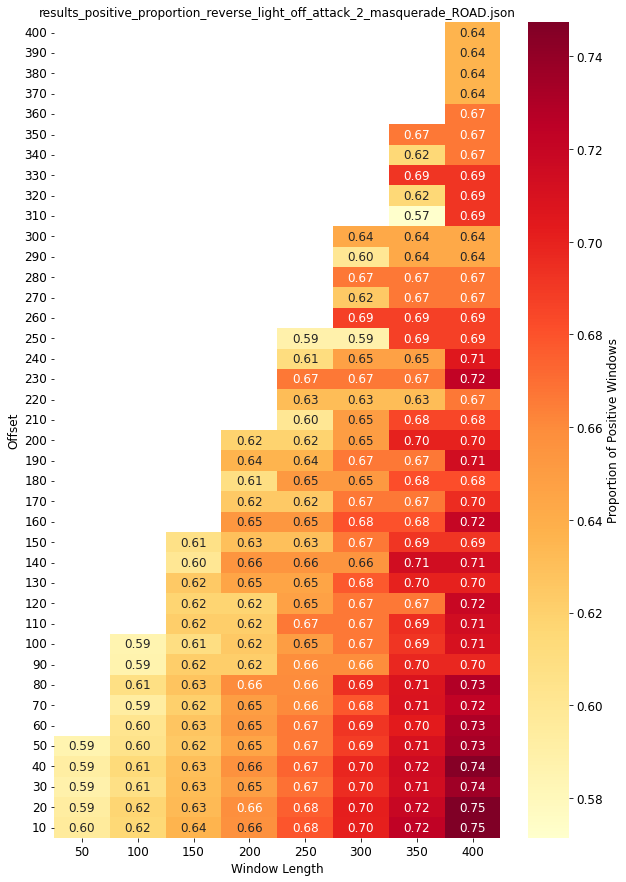

mean:  0.6595181954734861
std:  0.038920509273341675
median:  0.6603571428571429 

results_positive_proportion_reverse_light_off_attack_3_masquerade_ROAD.json


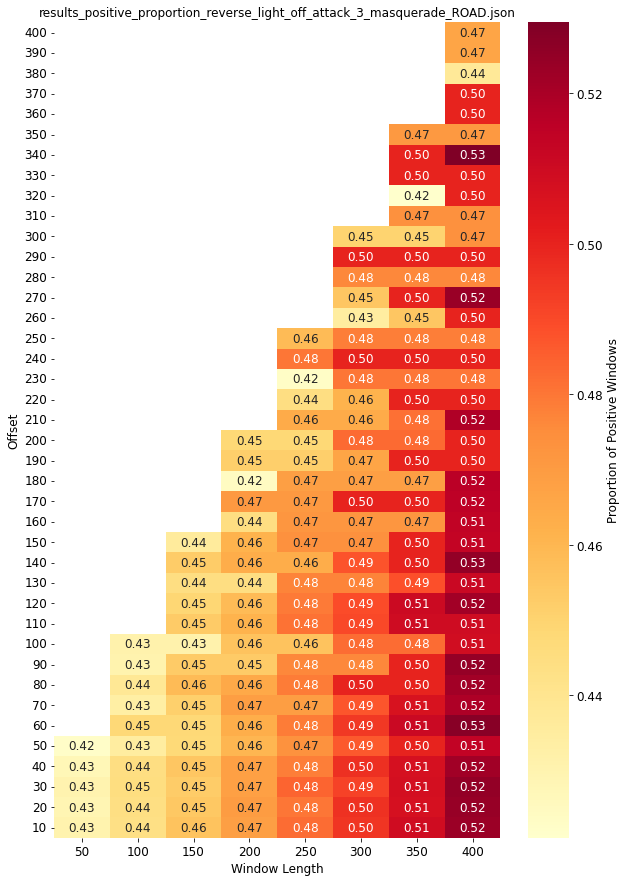

mean:  0.4769617502780144
std:  0.0267286356340479
median:  0.47619047619047616 

results_positive_proportion_reverse_light_on_attack_1_masquerade_ROAD.json


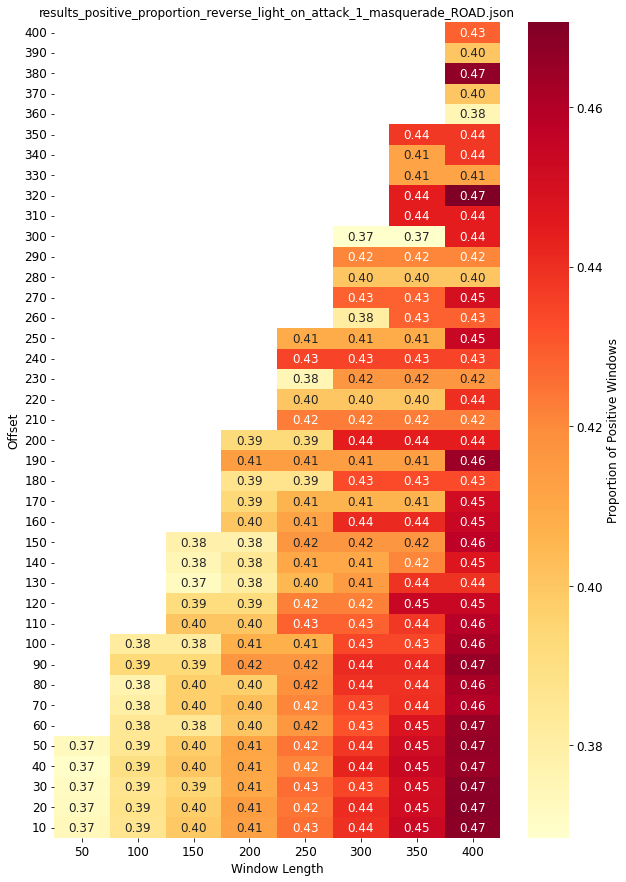

mean:  0.4188528731659163
std:  0.026195955958409643
median:  0.4166666666666667 

results_positive_proportion_reverse_light_on_attack_2_masquerade_ROAD.json


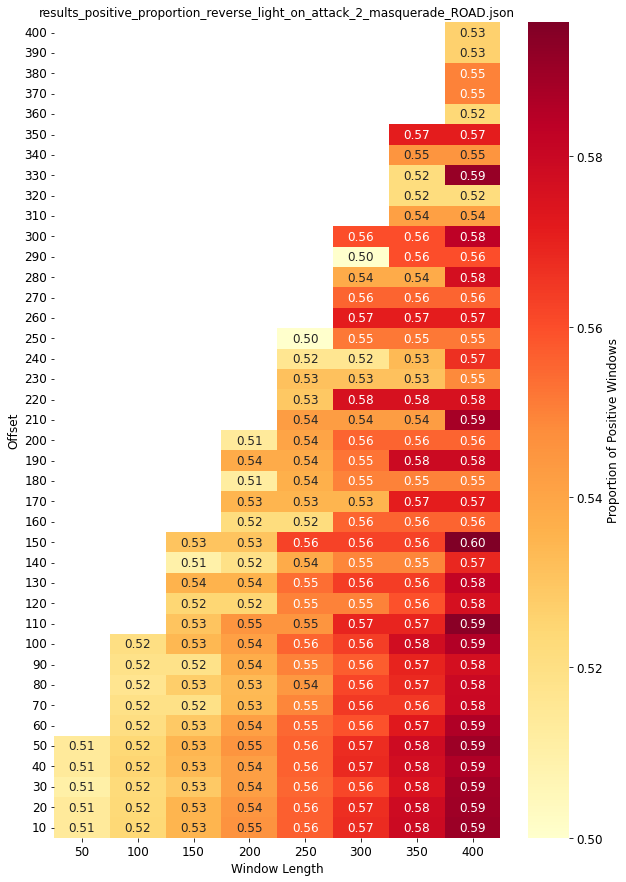

mean:  0.549312168988625
std:  0.022005171963374523
median:  0.55 

results_positive_proportion_reverse_light_on_attack_3_masquerade_ROAD.json


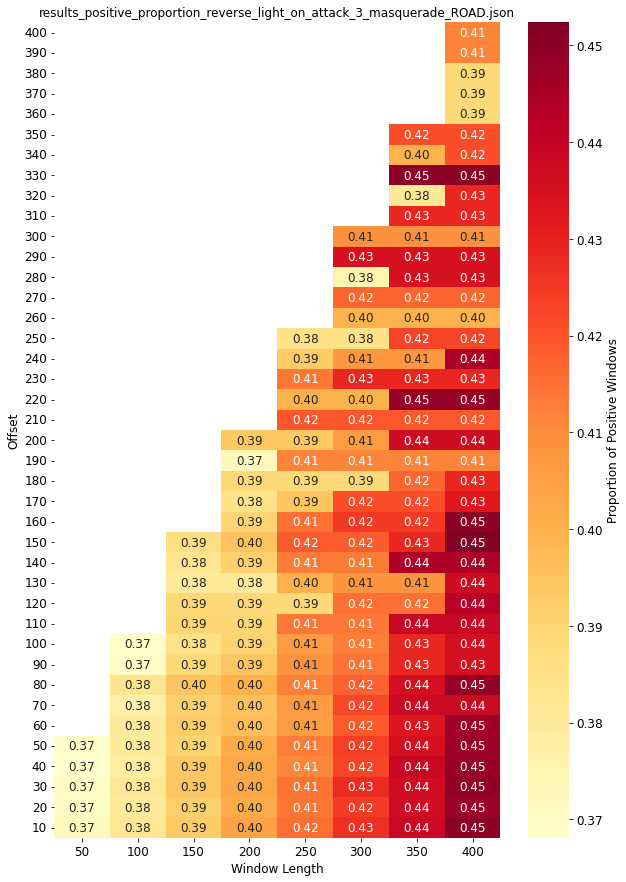

mean:  0.411237390046131
std:  0.021866860847497418
median:  0.4125992063492063 



In [20]:
# metrics = ["DR", "FAR", "AUC-ROC", "AUC-PR"]
# coordinates = [[0, 0], [0, 1], [1, 0], [1, 1]]

# fig, axes = plt.subplots(2, 2, figsize=(25, 14), sharex=True, sharey=True, gridspec_kw = {"wspace":-0.02, "hspace":0.1})
# fig.suptitle("Logistic Regression", size=12)

for index, file in enumerate(files):

    print(file)

    with open(f"/home/cloud/Projects/CAN/signal-ids-benchmark/data/{file}", "r") as outfile:
        grid2performance = json.load(outfile)


    key2aucroc = defaultdict(list)
    index = []

    for key in grid2performance.keys():

        # ground_truth = grid2performance[key]["ground_truth"]
        # predict_proba = grid2performance[key]["predict_proba"]

        positive_proportion = grid2performance[key]["positive_proportion"]

        columns = key.split("-")

        # print(columns)
        key2aucroc[columns[0]].append(positive_proportion)
        # sample.append(dict(entry))

        if columns[1] not in index: 
            index.append(columns[1])

    key2aucroc = dict(key2aucroc)
    # print(key2aucroc)
    # print(len(index), index)

    df_rocauc = pd.DataFrame({k:pd.Series(v) for k, v in key2aucroc.items()})
    df_rocauc.index = index
    df_rocauc = df_rocauc[::-1] # invert the order of dataframe rows

    fig, ax = plt.subplots(figsize=(10, 15))

    g = sns.heatmap(df_rocauc, annot=True, cbar=True, cbar_kws={"label": "Proportion of Positive Windows", "location":"right", "pad":0.05, "format":"%.2f"}, 
            annot_kws={"size": 12}, fmt=".2f", ax=ax, cmap="YlOrRd")

    ax.set_ylabel("Offset", fontsize=12)
    ax.set_xlabel("Window Length", fontsize=12)
    ax.set_title(file, fontsize=12)

    # colobar
    cax = g.figure.axes[-1]
    cax.yaxis.label.set_size(12)
    cax.tick_params(labelsize=12)

    # x-axis
    g.set_xticklabels(g.get_xticklabels(), rotation=0, fontsize=12)

    # y-axis
    if g.get_yticklabels():
            g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=12)

    plt.show()

    # Compute basic statistics about elements in the frame
    print("mean: ", np.nanmean(df_rocauc))
    print("std: ", np.nanstd(df_rocauc))
    print("median: ", np.nanmedian(df_rocauc), "\n")
